In [1]:
from create_data import DumbCirc as dc
from dklsuq import DeepKernelSUQ as dklu
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 1)
fc, pc, tc = data_instance.create_dataset(100, 2, [100], [0.2], True)

In [3]:
import torch
torch.manual_seed(226)
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

In [4]:
model_diag = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
model_chol = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [7]:
model_chol.set_device(device)

In [8]:
model_chol.train_cholesky_plus_noise(num_epochs=20, learning_rate=0.0002)

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dklsuq.py:236: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724788960438/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  posterior_mean.T @ torch.linalg.inv(posterior_cholesky_plus_noise) @ posterior_mean)


Epoch:0, Loss: 0.05815045850781294
Epoch:1, Loss: 0.06593255235774984
Epoch:2, Loss: 0.07000306528273582
Epoch:3, Loss: 0.077648174805873
Epoch:4, Loss: 0.088911066035692
Epoch:5, Loss: 0.10300195061092683
Epoch:6, Loss: 0.12924749621437537
Epoch:7, Loss: 0.1585781512877013
Epoch:8, Loss: 0.1611713693556164
Epoch:9, Loss: 0.1590872252294419
Epoch:10, Loss: 0.1849941943265612
Epoch:11, Loss: 0.21746475447582597
Epoch:12, Loss: 0.2961778831400683
Epoch:13, Loss: 0.3783582818960395
Epoch:14, Loss: 0.37821960046089037
Epoch:15, Loss: 0.3775183119790648
Epoch:16, Loss: 0.3605949271826935
Epoch:17, Loss: 0.3581976706332809
Epoch:18, Loss: 0.38585505664766484
Epoch:19, Loss: 0.37429700049102355


In [9]:
model_chol.set_test_data(tc)

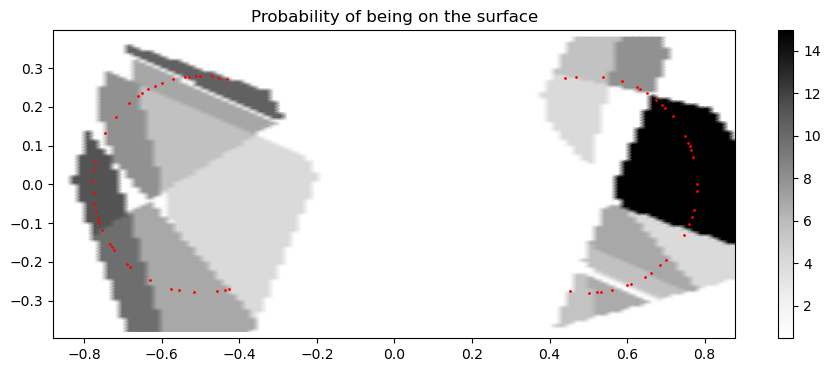

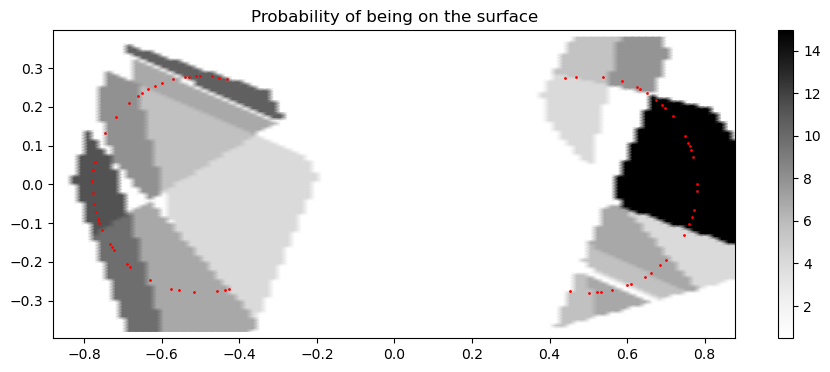

In [10]:
model_chol.predict()

In [11]:
model_chol.set_test_data(pc[:2, :])

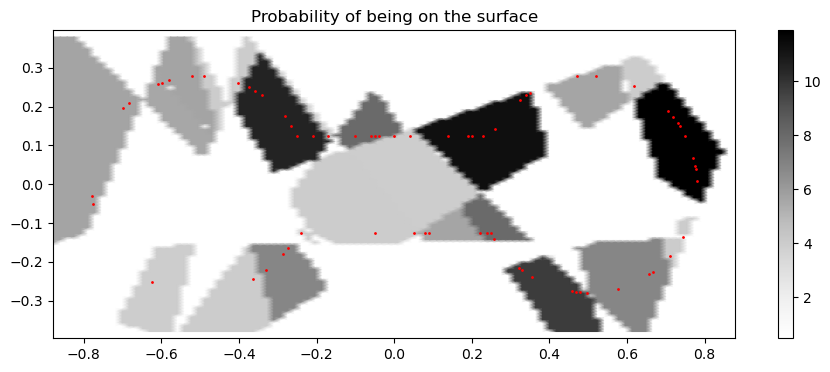

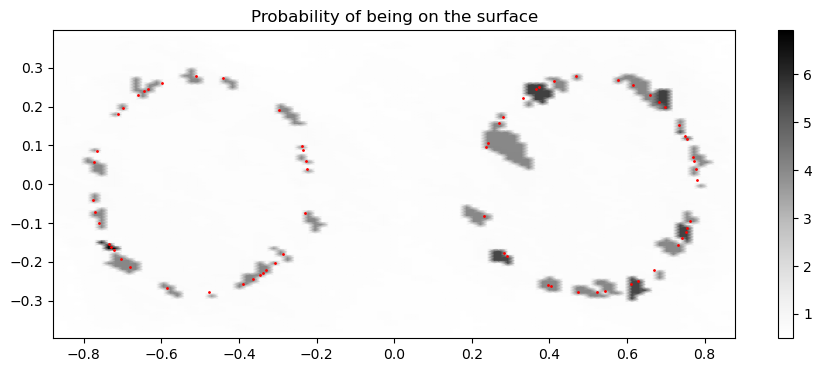

In [12]:
model_chol.predict()